In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay 
import matplotlib.pyplot as plt

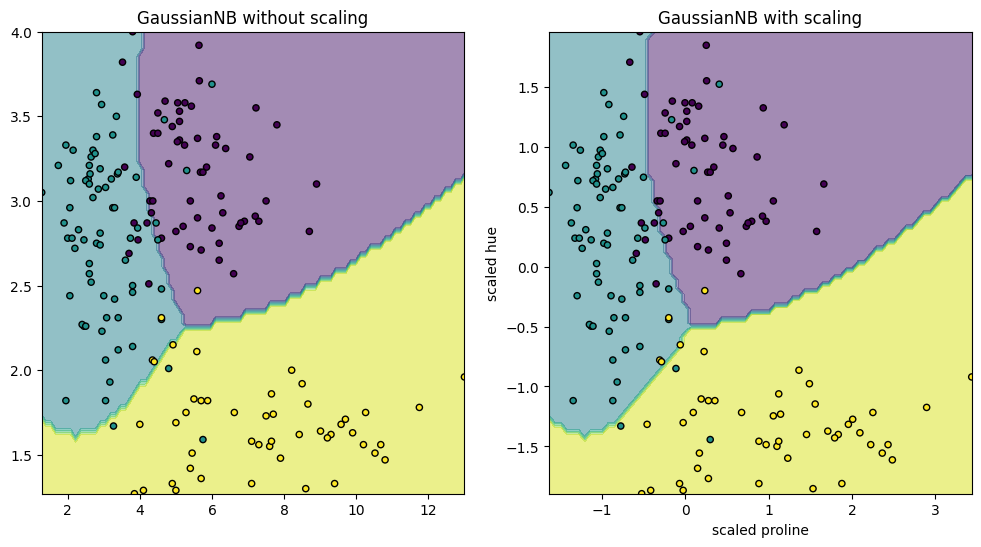

In [6]:
x, y = load_wine(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

clf = GaussianNB()
clf.fit(x_train, y_train)

X_plot = x[:, [9,11]]
scaler = StandardScaler()

X_plot_scaled = scaler.fit_transform(X_plot)

def fit_and_plot_model(X_plot, y, clf, ax):
  clf.fit(X_plot, y)
  disp = DecisionBoundaryDisplay.from_estimator(clf, X_plot,response_method="predict", alpha=0.5, ax=ax)
  disp.ax_.scatter(X_plot[:,0], X_plot[:,1], c=y, s=20, edgecolor="k")
  disp.ax_.set_xlim((X_plot[:,0].min(), X_plot[:,0].max()))
  disp.ax_.set_ylim((X_plot[:,1].min(), X_plot[:,1].max()))
  return disp.ax_
  
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,6))

fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("GaussianNB without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_=ax2.set_title("GaussianNB with scaling")